# POLI 175 - Machine Learning for Social Sciences

## Python Refresh II

---

# Matplotlib

Matplotlib is the main package for data visualization in Python.

To create a data visualization with matplotlib, we need to load the data into Python. We will work here with the datasets `uspop`, `tips` and `PErisk`.

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the datasets

# US Population
uspop = pd.read_csv('data/uspop.csv', parse_dates = ['year'])
uspop = uspop.set_index('year')

# Political and Economic Risk
perisk = pd.read_csv('data/PErisk.csv')
perisk = perisk.set_index('country')

# Tips
tips = pd.read_csv('data/tips.csv')

**Exercise**: Check the head of the datasets. What do we have in each of them?

In [6]:
## Your answer here
uspop.head()

,uspop
year,
1790-01-01,3.93
1800-01-01,5.31
1810-01-01,7.24
1820-01-01,9.64
1830-01-01,12.90


In [8]:
perisk.head()

,courts,barb2,prsexp2,prscorr2,gdpw2
country,,,,,
Argentina,0,-0.720775,1,3,9.690170
Australia,1,-6.907755,5,4,10.304840
Austria,1,-4.910337,5,4,10.100940
Bangladesh,0,0.775975,1,0,8.379768
Belgium,1,-4.617344,5,4,10.250120


In [10]:
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


## Lineplots

The default plot done by matplotlib is the lineplot. This type of plot is well suited for displaying time-series data, such as stock prices or country populations. Let's check how it works:

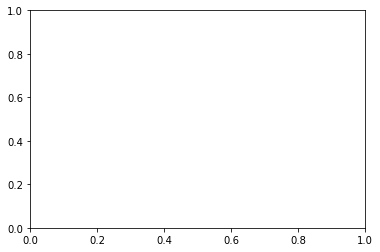

In [12]:
fig, ax = plt.subplots()

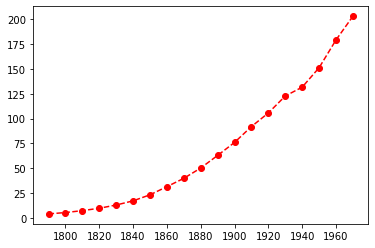

In [14]:
# My code here
fig, ax = plt.subplots()
ax.plot(uspop.index, uspop["uspop"], color = "red", marker = "o", linestyle = "--")
plt.show()

```py
fig, ax = plt.subplots()
```
- Saves and create subplots of the figure

```py
plt.show()
```
- Shows the last plot created

**See [matplotlib docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for more paramters to change the style of the plot**

### Set Label Text

We can add labels using `set_xlabel` and `set_ylabel`.

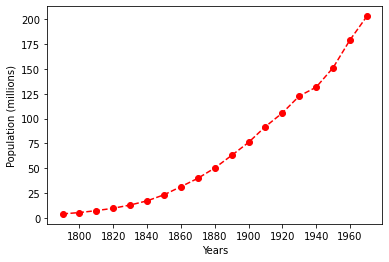

In [15]:
# My code here
fig, ax = plt.subplots()

ax.plot(uspop.index, uspop["uspop"], color = "red", marker = "o", linestyle = "--")

ax.set_xlabel("Years")

ax.set_ylabel("Population (millions)")

plt.show()

### Two plots in the same graph

Now, let us create the log of the population and add to the data:

In [16]:
# My code here
uspop["logpop"] = np.log(uspop["uspop"])
uspop.head()

,uspop,logpop
year,,
1790-01-01,3.93,1.368639
1800-01-01,5.31,1.669592
1810-01-01,7.24,1.979621
1820-01-01,9.64,2.265921
1830-01-01,12.90,2.557227


We can put the plots together, changing the scale in the left and right hand sides. This is very useful to plot time series that have different axis values:

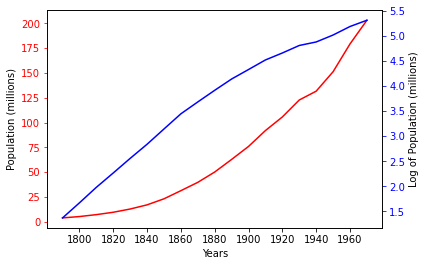

In [22]:
# My code here

fig, ax = plt.subplots()

# first plot
ax.plot(uspop.index, uspop["uspop"], color = "red")

ax.set_xlabel("Years")

ax.tick_params("y", colors = "red")

ax.set_ylabel("Population (millions)")

# second plot
ax2 = ax.twinx()

ax2.plot(uspop.index, uspop["logpop"], color = "blue")

ax2.tick_params("y", colors = "blue")

ax2.set_ylabel("Log of Population (millions)")


plt.show()

## Bar-Charts

Bar-plots are useful to see the frequency in variables:

In [23]:
# My code here
perisk["exprisk"] = 5 - perisk["prsexp2"]
perisk.head()

,courts,barb2,prsexp2,prscorr2,gdpw2,exprisk
country,,,,,,
Argentina,0,-0.720775,1,3,9.690170,4
Australia,1,-6.907755,5,4,10.304840,0
Austria,1,-4.910337,5,4,10.100940,0
Bangladesh,0,0.775975,1,0,8.379768,4
Belgium,1,-4.617344,5,4,10.250120,0


In [24]:
tab = perisk["exprisk"].value_counts(sort = False)
tab

0    14
1    14
2    19
3     7
4     6
5     2
Name: exprisk, dtype: int64

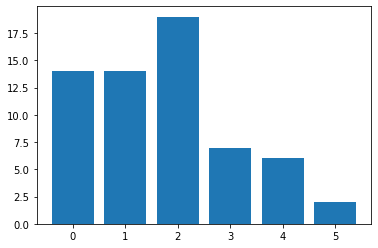

In [25]:
# My code here
fig, ax = plt.subplots()

ax.bar(tab.index, tab)

plt.show()

**Exercise**: Do the same bar-chart with weekdays in the `tips` dataset.

In [26]:
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


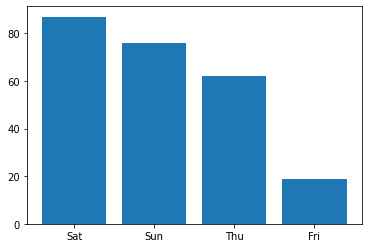

In [31]:
fig, ax = plt.subplots()

tab = tips["day"].value_counts()

ax.bar(tab.index, tab)

plt.show()

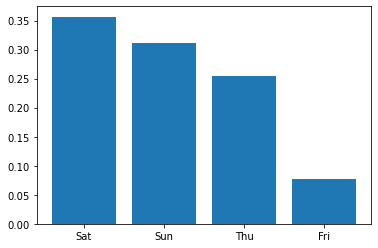

In [32]:
# to get proportions
fig, ax = plt.subplots()

tab = tips["day"].value_counts(normalize = True)

ax.bar(tab.index, tab)

plt.show()

## Histograms

To visualize numeric variables, the histogram is the best plot. For instance, here is a histogram of the log of gdp:

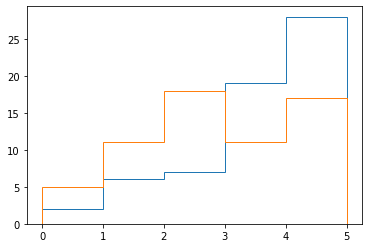

In [33]:
# My code here

fig, ax = plt.subplots()

ax.hist(perisk['prsexp2'], bins = 5, histtype = "step")

ax.hist(perisk['prscorr2'], bins = 5, histtype = "step")

plt.show()

When creating historgrams, make sure ```bins``` is set to a value corresponding to the size of the data to make the graph not look funky

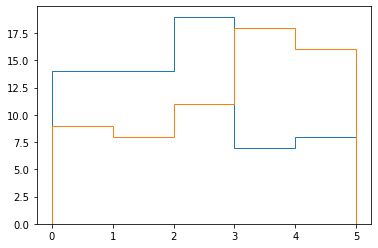

In [36]:
# My code here

perisk["corrisk"] = 5 - perisk["prscorr2"]

fig, ax = plt.subplots()
ax.hist(perisk["exprisk"], bins = 5, histtype = "step")
ax.hist(perisk["corrisk"], bins = 5, histtype = "step")

plt.show()

We can even add multiple variables to our plot:

In [38]:
# My code here

**Exercise**: Create a histogram of tips and total bill.

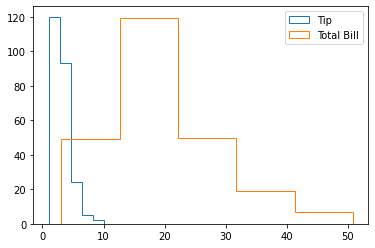

In [40]:
## Your code here
fig, ax = plt.subplots()

ax.hist(tips["tip"], bins = 5, histtype = "step", label = "Tip")
ax.hist(tips["totbill"], bins = 5, histtype = "step", label = "Total Bill")

ax.legend()

plt.show()

## Box-plots

To visualize numeric variables, the box-plots are also great plots:

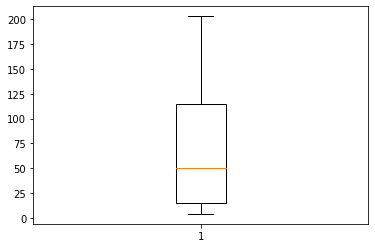

In [41]:
# My code here
fig, ax = plt.subplots()
ax.boxplot(uspop["uspop"])
plt.show()

**Exercise**: Create a boxplot of tips and total bill.

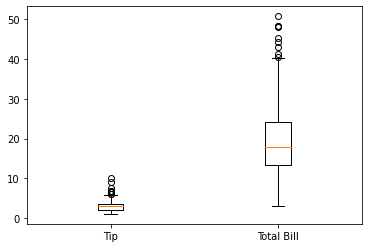

In [42]:
## Your answers here
fig, ax = plt.subplots()

ax.boxplot([tips["tip"], tips["totbill"]])
ax.set_xticklabels(["Tip", "Total Bill"])

plt.show()

## Scatter-plots

Scatter-plots are great to display numeric x numeric relationships.

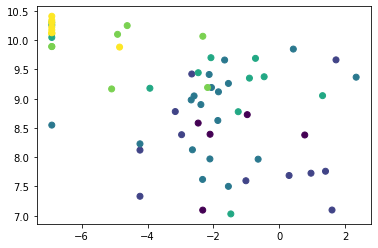

In [43]:
# My code here
fig, ax = plt.subplots()

ax.scatter(perisk["barb2"], perisk["gdpw2"], c = perisk["prscorr2"])

plt.show()

**Exercise**: Plot a scatter of total bill x tip in the tips dataset. Then color by the week day.

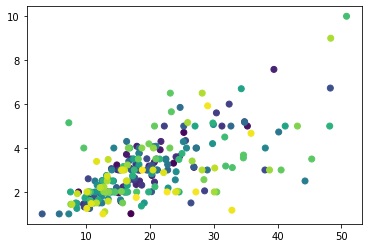

In [44]:
## Your answers here
fig, ax = plt.subplots()

ax.scatter(tips["totbill"], tips["tip"], c = tips["obs"])

plt.show()

**Great job!!!**